In [125]:
require('ggplot2')

Loading required package: ggplot2



In [45]:
doc_matrix = as.matrix(read.table('termdocmatrix/matrix.txt', sep = ','))

In [106]:
articles = read.csv('termdocmatrix/index_to_article.csv')

In [47]:
pure_words = read.csv('termdocmatrix/pure_words.csv')

In [49]:
pure_words_indexes = pure_words[, 1]

In [53]:
doc_matrix_subset = doc_matrix[, pure_words_indexes]

In [54]:
nrow(doc_matrix_subset)

[1] 73

In [55]:
ncol(doc_matrix_subset)

[1] 11570

In [57]:
doc_svd = svd(doc_matrix_subset)

In [59]:
matD = diag(doc_svd$d)

In [60]:
matU = doc_svd$u

In [61]:
matV = doc_svd$v

In [66]:
sum(((doc_matrix_subset) - (matU %*% matD %*% t(matV)))**2)

[1] 2.109066e-20

In [75]:
matrix(data=c(1,2,3,4,5,6,7,8,9),nrow=3,ncol=3,byrow=TRUE)**2

1,4,9
16,25,36
49,64,81


In [83]:
selected_r = 2

In [95]:
doc_coords = matU[, 1:selected_r] %*% matD[1:selected_r, 1:selected_r]

In [96]:
term_coords = matV[, 1:selected_r] %*% matD[1:selected_r, 1:selected_r]

In [159]:
d = data.frame(v1 = doc_coords[,1], v2 = doc_coords[,2], index = c(1:nrow(doc_coords)), name = articles['article'])

In [160]:
g1 = ggplot(data = d, aes(x = v1, y = v2))

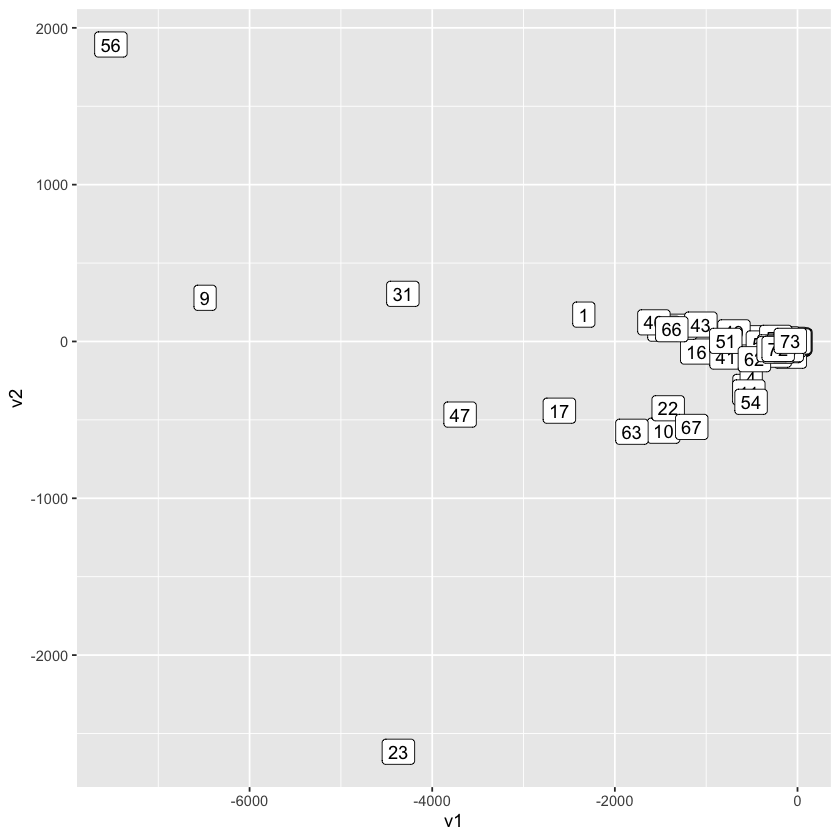

In [161]:
g1 + geom_point() + geom_label(aes(label=index))

In [166]:
articles[c(56,9, 23), ]

,index,article
,<int>,<fct>
56,55,openssl-certificates.md
9,8,cellular-automata-infectious-disease-simulation.md
23,22,from-perceptron-to-neuralnet.md


In [167]:
articles[c(31, 47), ]

,index,article
,<int>,<fct>
31,30,implementing-a-rubkis-cube-in-mathematica.md
47,46,methods-telling-if-a-point-is-inside-some-polygon.md


In [168]:
articles[c(1, 17), ]

,index,article
,<int>,<fct>
1,0,4sum-problem-branch-and-bound-solution.md
17,16,eight-queen-problem.md


In [170]:
articles[c(22,63,10,67),]

,index,article
,<int>,<fct>
22,21,floating-number-representation.md
63,62,simulate-star-motion-in-mathematica.md
10,9,complex-plane-and-eulers-formular-and-liuhuis-pi-algorithm.md
67,66,sudoku-mathematical-formulation.md
